<h1> Context </h1>
<p> Within this dataset are the salaries of several Data Science Fields in the Data Science Domain. 
The goal is to describe the characteristics of the data and then build a model that allows us to identify what the wage is according to different patterns identified earlier. </p>
<h1> Data Dictionary </h1>
<p> Data Science Job Salaries Dataset contains 11 columns, each are:
    <ol>
        <li> work_year: The year the salary was paid. </li>
        <li>experience_level: The experience level in the job during the year</li>
        <li>employment_type: The type of employment for the role</li>
        <li>job_title: The role worked in during the year.</li>
        <li>salary: The total gross salary amount paid.</li>
        <li>salary_currency: The currency of the salary paid as an ISO 4217 currency code.</li>
        <li>salaryinusd: The salary in USD</li>
        <li>employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.</li>
        <li>remote_ratio: The overall amount of work done remotely</li>
        <li>company_location: The country of the employer's main office or contracting branch</li>
        <li>company_size: The median number of people that worked for the company during the year</li>
    </ol>
</p>
<h1> Approach to solve the problem </h1>
<ol>
    <li> Import the necessary libraries </li>
    <li> Read the dataset and get an overview </li>
    <li> EDA a.Univariante,b.Bivariante </li>
    <li> Data preprocessing if any </li>
    <li> Define the performance metric and build ML models </li>
    <li> Compare models and determine the best one </li>
    <li> Observations and business insights </li>
</ol>

<h2> Importing the necessary libraries and overview of the dataset </h2>

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Removes the limit for the number of displayed columns 

pd.set_option("display.max_columns",None)

#Sets the limit for the number of displayed rows

pd.set_option("display.max_rows",200)

# To build models for prediction

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.linear_model import LinearRegression, Ridge, Lassob

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

from sklearn.preprocessing import LabelEncoder

# For tuning the model 

from sklearn.model_selection import GridSearchCV

# To check the model performance 

from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error

<h2> Loading the dataset </h2>

In [2]:
# Load the Salaries Dataset

data = pd.read_csv("ds_salaries.csv")

In [3]:
# Copy data to another variable to avoid any change to the original data 

same_data = data.copy()

<h2> Data Overview </h2>

In [4]:
# View the first 5 rows

same_data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
# View the last 5 rows 

same_data.tail(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [6]:
# Understand the shape of the data 

same_data.shape

(3755, 11)

<p> The dataset has 3755 rows and 11 columns </p>

In [7]:
# Checking the info of the data 

same_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


<b> Observations </b>:
<ol>
    <li> "work_year", "salary", "salary_in_usd" and "remote_ratio" are numeric data type and the rest of the columns are object data type </li>
    <li> The number of non-null values is the same as the total number of entries in the data i.e. there are no null values</li>
    </ol>


In [8]:
# Checking for duplicate values in the Data 

same_data.duplicated().sum()/same_data.shape[0]

0.3118508655126498

<p>More or less 30% of the rows are duplicated. This would lead to errors in model construction. 
Let us therefore remove these unnecessary rows.</p>

In [9]:
# Remove duplicate 

# same_data.drop_duplicates(inplace= True)

<h2> EDA </h2>
<h3> Univariante Analysis </h3>

In [10]:
# Checking the descriptive statistics of the columns 

same_data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


<b> Observations </b>:
<ol>
    <li> We can see that for the variable "salary" the mean is greater than the median, so we can say that the distribution of values is right skewed. This may be due to the fact that the values are expressed in different currencies from each other and thus are not comparable. </li>
    <li> Regarding the variable "salary_in_usd" we note that the mean and median are similar. This allows us to assume that the distribution is centered and symmetrical. Unlike the "salary" column in this case all salaries are expressed in the USD currency. In this case we would need to assess what currency exchange rate was used since we have rows with different years and therefore exchange rates that might be different from each other. </li>
    <li> Regarding the variable "remote_ratio" we can see that they are a 25% of the rows that we can examine have a rate of 100%, and thus only 25% of the questioned workers work in full remote. </li>
</ol>

In [11]:
# List of all important categorical variables 

cat_col= ["experience_level", "employment_type", "job_title", "company_size", "remote_ratio", "company_location" ]

for column in cat_col:
    
    print(column, end="\n\n")
    
    print(same_data[column].value_counts(normalize= True))
    
    print("-"*50)

experience_level

SE    0.670040
MI    0.214381
EN    0.085220
EX    0.030360
Name: experience_level, dtype: float64
--------------------------------------------------
employment_type

FT    0.990146
PT    0.004527
CT    0.002663
FL    0.002663
Name: employment_type, dtype: float64
--------------------------------------------------
job_title

Data Engineer                               0.276964
Data Scientist                              0.223702
Data Analyst                                0.162983
Machine Learning Engineer                   0.076964
Analytics Engineer                          0.027430
Data Architect                              0.026897
Research Scientist                          0.021838
Data Science Manager                        0.015446
Applied Scientist                           0.015446
Research Engineer                           0.009854
ML Engineer                                 0.009055
Data Manager                                0.007723
Machine Learning Sc

In [12]:
list_company_location = ["US","GB","CA", "IN", "DE", "ES", "FR"]
same_data["company_location"] = [same_data.loc[i,"company_location"] if same_data.loc[i,"company_location"] in list_company_location else "OTHER" for i in same_data.index ]

In [13]:
list_job_title = ["Data Engineer","Data Scientist","Data Analyst", "Machine Learning Engineer","Analytics Engineer", "Research Scientist","Data Science Manager"
                  ,"Research Engineer","Applied Scientist", "Machine Learning Scientist"]
same_data["job_title"] = [same_data.loc[i,"job_title"] if same_data.loc[i,"job_title"] in list_job_title else "OTHER" for i in same_data.index ]

<b> Observations </b>:
<ol>
    <li> We can see that 60% of the workers have a lot of experience in the field, and more than 85% have a mid or senior level of experience. </li>
    <li> 98% of workers have a full-time contract, this variable therefore is not so discriminatory in defining the wage level </li>
    <li> We have a lot of job titles, although about 60% of workers can be encapsulated in 3 categories: Data Engineer, Data Scientist and Data Analyst </li>
    <li> About 80% work for medium-sized companies </li>
</ol>


In [14]:
# Function to plot a boxplot and a histogram along the same scale 

def histogram_boxplot(data, feature, figsize= (12,7), kde= False, bins= None):
    """
    Boxplot and histogram combined
    
    data: dataframe
    
    feature: dataframe column
    
    figszie: size of the figure (default(12,7))
    
    kde: whther to show density curve (default False)
    
    bins: number of bins for histogram (default None)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        
        nrows= 2,
        
        sharex= True,
        
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        
        figsize = figsize
    )
    
    sns.boxplot(
        data= data, x= feature, ax= ax_box2, showmeans= True, color= 'violet'
    )
    
    sns.histplot(
        data= data, x= feature, ax= ax_hist2, kde= kde, bins= bins, palette= "winter"
    ) if bins else sns.histplot(
        data= data, x= feature, kde= kde, ax= ax_hist2
    )
    
    ax_hist2.axvline(
        data[feature].mean(), color= 'green', linestyle= "--"
    )
    
    ax_hist2.axvline(
        data[feature].median(), color= 'black', linestyle='-'
    )

<h5> salary </h5>

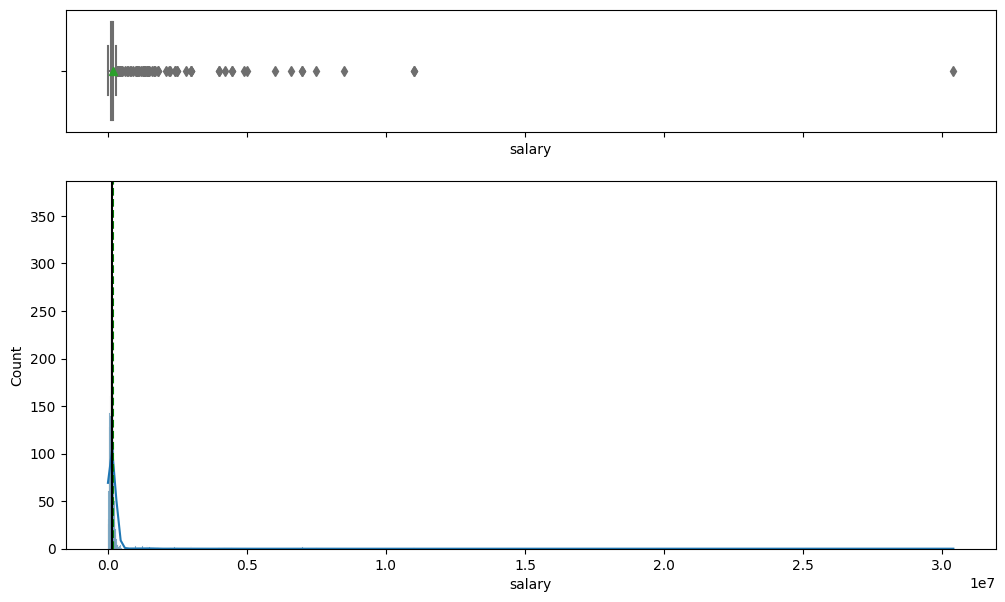

In [15]:
histogram_boxplot(same_data, "salary", kde= True)

<p><b> Observations </b>: As we assumed earlier, by not having the same unit of measurement the distribution of wages is distinctly right skewed. This could lead us into error, for it would appear that the distribution of wages is highly skewed. However, we expect that by going to consider the "salary_in_usd" column this asymmetry is no longer so pronounced.</p>

<h5> salary_in_usd</h5>

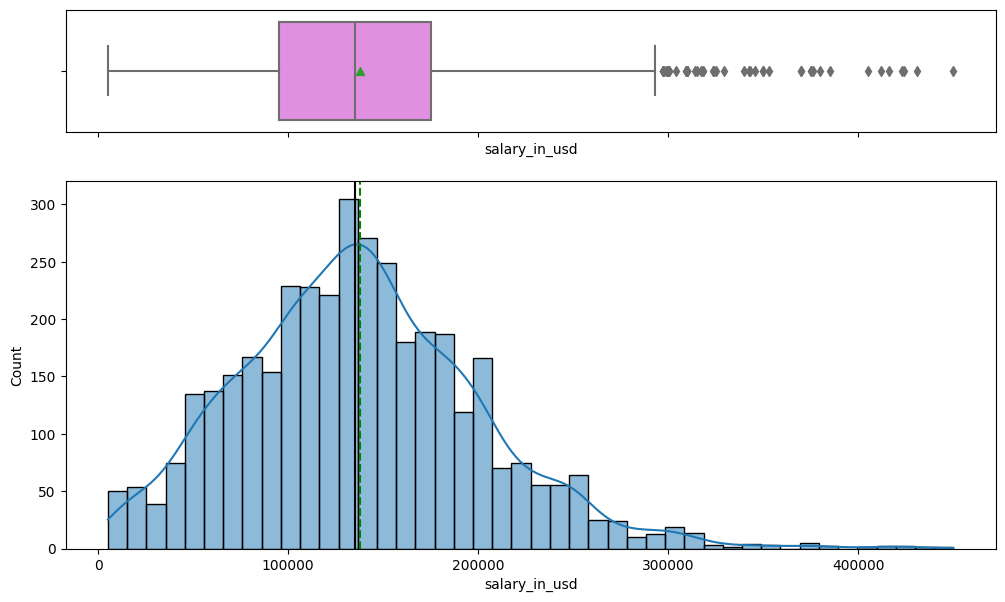

In [16]:
histogram_boxplot(same_data, "salary_in_usd", kde= True)

<p><b> Observations </b>: In this case we can see that the distribution seems more centered. We have a few workers who exceed 300 000 USD annually but cannot be considered as outliers. </p>

In [17]:
# Function to create barplot 

def countplot_func(data, x_feature, hue= None, figsize= (12, 7), orient= None):
    """
    countplot
    
    data: dataframe
    
    feature: dataframe column
    
    figszie: size of the figure (default(12,7))
    
    hue: groups (default None)
    
    orient: if you want vertical or horizontal graph(default None)
    """
    
    fig = plt.figure(figsize= figsize)
    
    sns.countplot(data= data, x= x_feature, hue= hue, orient= orient, palette= sns.color_palette("muted"), dodge= False)
    
    plt.title("Analysis " + x_feature )
    
    plt.xlabel(x_feature)
    
    plt.show()

<h5> company_size </h5>

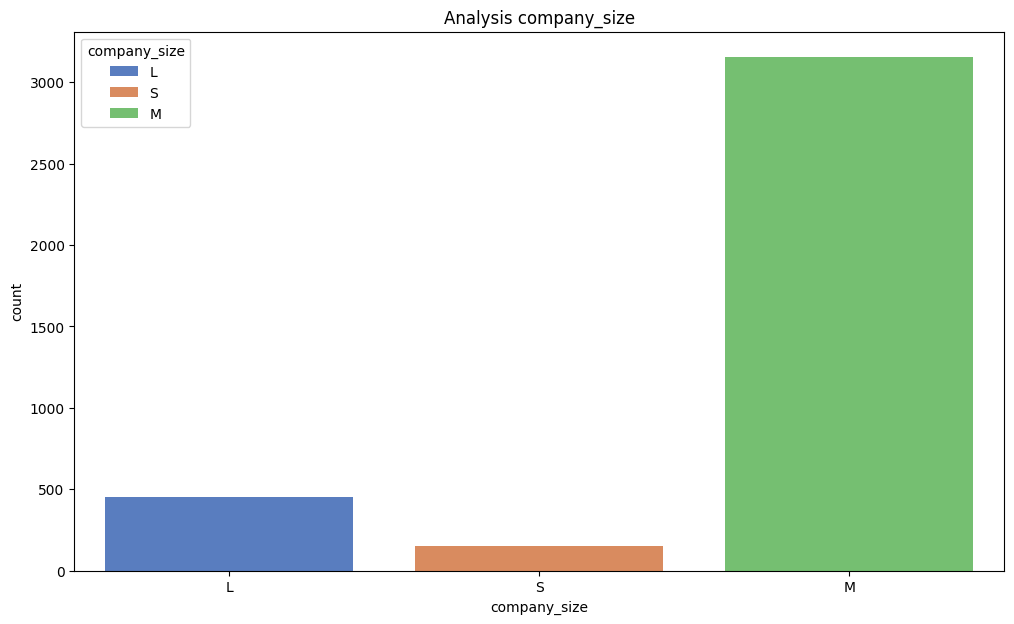

In [18]:
countplot_func(same_data, "company_size", "company_size")

<p><b> Observations </b>: We can see that most of the workers work at medium-sized companies (about 79 percent). The remainder is divided between large-scale (about 16%) and small-scale (about 5%) companies. Apparently, the companies that invest the most in this field seem to be medium-sized companies. However, this may also be incorrect since it is likely that in numbers medium-sized companies are greater than large companies. </p>

<h5> remote_ratio </h5>

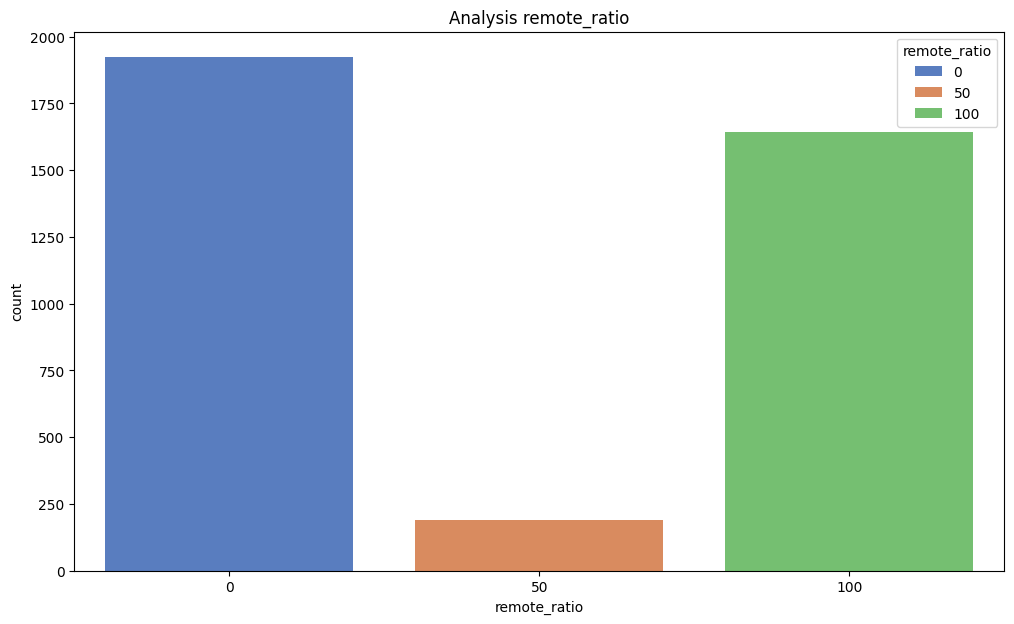

In [19]:
countplot_func(same_data, "remote_ratio", "remote_ratio")

<p><b> Observations</b>: We note that the variable "remote_ratio" is divided roughly equally between those who do not have the option of smart working and those who do have the option of full-remote working. We then have a small percentage (about 7 percent) who instead enjoy a 50-50 hybrid solution.</p>

<h5>employment_type</h5>

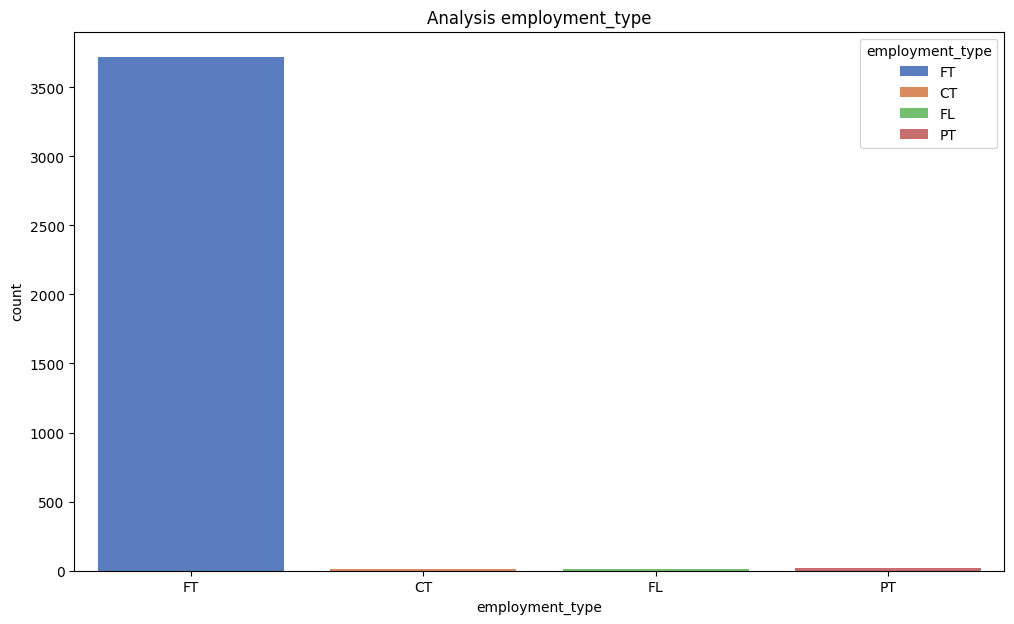

In [20]:
countplot_func(same_data, "employment_type", "employment_type")

<p><b> Observations </b>: In this case we can say that almost all workers have full-time contracts with very few exceptions among other classes.</p>

<h3> Bivariante Analysis </h3>

<p> As a first step we go to see if there is correlation between the different variables we have within the dataset  </p>

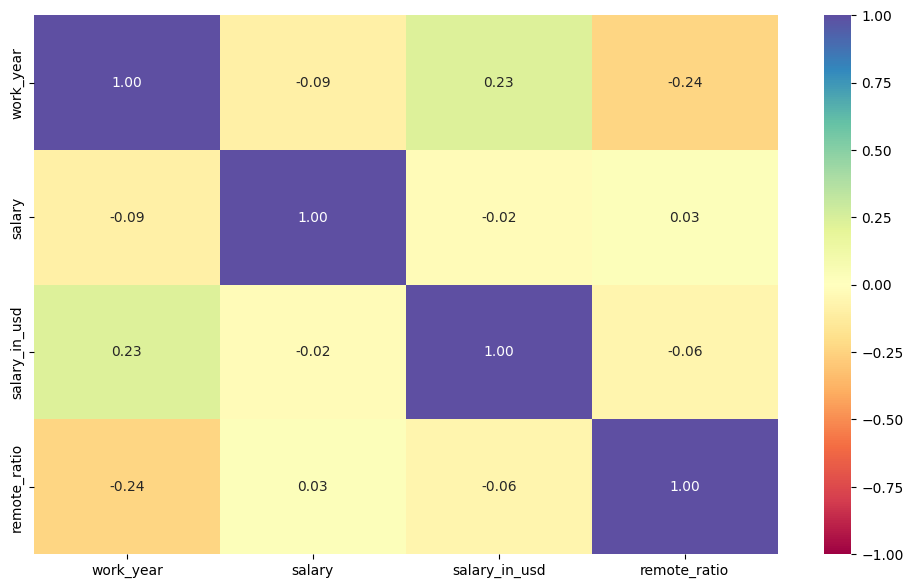

In [21]:
# Finding the correlation between various columns of the dataset 

plt.figure(figsize= (12, 7))

sns.heatmap(same_data.corr(), annot= True, vmin= -1, vmax= 1, fmt= ".2f", cmap= "Spectral")

plt.show()

<p><b> Observations </b>:
    <ol>
        <li> The heatmap shows that there is no correlation between variables </li>
        <li> The continuos variables show no correlation with the target variable which indicates that the categorical variables might be more important for the prediction </li>
    </ol>
</p>

In [22]:
# Function to plot stacked bar 

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    
    predictor: independent variable
    
    target: target variable
    """
    
    count = data[predictor].nunique()
    
    sorter= data[target].value_counts().index[-1]
    
    tab1= pd.crosstab(data[predictor], data[target], margins= True).sort_values(by= sorter, ascending= False)
    
    print(tab1)
    
    print("_"*120)
    
    tab= pd.crosstab(data[predictor], data[target], normalize= "index").sort_values(by= sorter, ascending= False)
    
    tab.plot(kind= 'bar', stacked= True, figsize= (count +1, 5))
    
    plt.legend(
        loc= "lower left",
        frameon= False
    )
    
    plt.legend(loc= "upper left", bbox_to_anchor= (1,1))
    
    plt.show()

<h5> Let's start by checking the distribution of the Experience by salary_in_usd </h5>

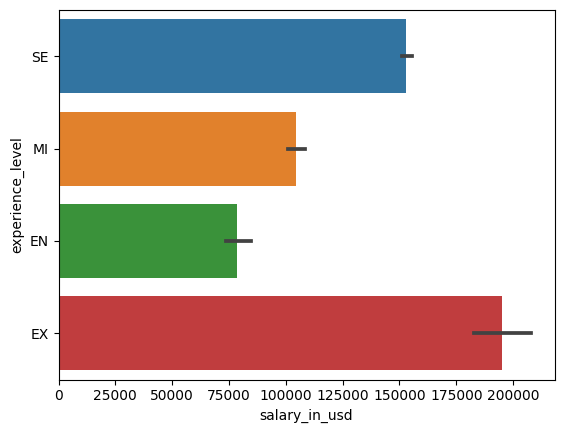

In [23]:
sns.barplot(y= "experience_level", x= "salary_in_usd", data= same_data)

plt.show()

<p><b> Observations</b>: We can see that positions with "EX" level experience tend to earn about 20k USD more than the exactly previous experience level i.e. "SE". 
In any case we can see that experience level is a good indicator of expected salary.</p>

<h5> Let's check the "experience_level" vs "company_size" </h5>

company_size        L     M    S   All
experience_level                      
All               454  3153  148  3755
MI                134   621   50   805
EN                100   171   49   320
SE                207  2266   43  2516
EX                 13    95    6   114
________________________________________________________________________________________________________________________


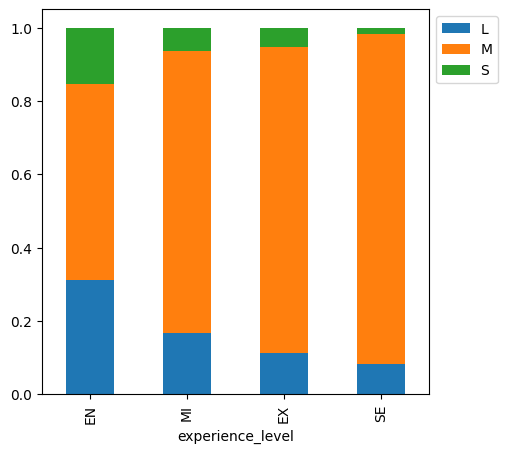

In [24]:
stacked_barplot(same_data, "experience_level", "company_size")

<p><b>Observations</b>:
    <ol>
        <li> Regarding "EN" level we note that it is found more in very large companies than other experience levels that are found much less in large companies. 
        </li>
        <li> Interesting are the other levels, in fact the positions with "SE" experience we find them much less than the small companies.</li>
        <li> On the other hand, regarding the aspects of "EX" level positions, it is interesting to see that they are found more in medium-sized companies than in other companies. This is perhaps because the dataset contains mostly medium-sized companies</li>
    </ol>
</p>

<h5> Let's check the "company_size" vs "salary_in_usd" </h5>

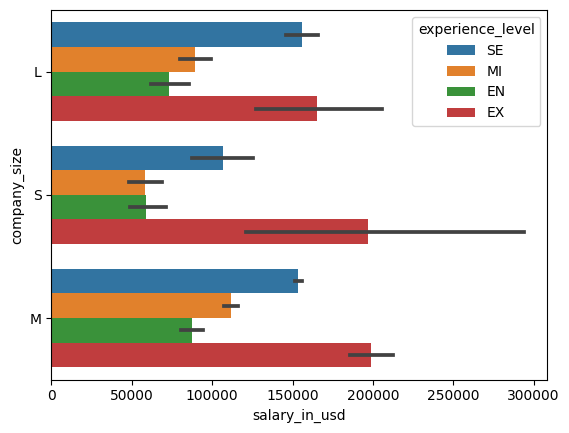

In [25]:
sns.barplot(y= "company_size", x= "salary_in_usd", data= same_data, hue="experience_level")

plt.show()

<p><b> Observations</b>:In general we can see that salaries are higher in medium-sized companies, where we notice that depending on the level of experience being considered we have a higher average salary when compared to the same categories in large or small companies. </p>

<h5> Let's check "remote_ratio" vs "company_size" </h5>

company_size    L     M    S   All
remote_ratio                      
All           454  3153  148  3755
100           220  1332   91  1643
50            110    47   32   189
0             124  1774   25  1923
________________________________________________________________________________________________________________________


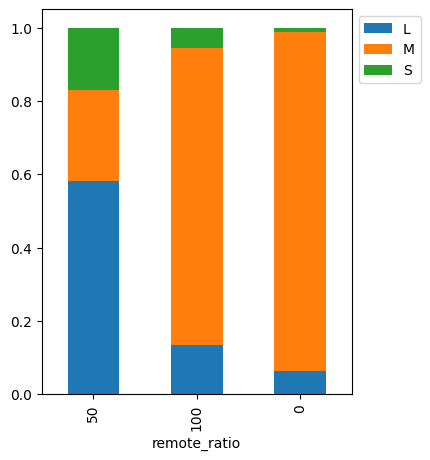

In [26]:
stacked_barplot(same_data, "remote_ratio", "company_size")

<p><b> Observations </b>: We note how the hybrid solution is made available more in large-scale companies, while the full-remote solution is made available more in medium-sized companies. </p>

<h2> Data Preparation for Model Buildin </h2>

<p>
    <ol>
        <li> Before to procede we have to drop some useless columns </li>
        <li> After that we have to encode the categorical variables </li>
        <li> Separate independent variables and the dependent variables </li>
        <li> We'll split the data into train and test to be able to evaluate the model that we train on the training data </li>
    </ol>
</p>

<p> We remove "salary" variable because do not have the same currency, "salary_currency" because we measure all the salaries in USD and "job_title" because we have a lot of different job_title. Maybe in a future versions of the model we can feature engeeniring this variables in order to have 4 or 5 different job titles and get better results. </p>

In [27]:
# Drop some useless columns

same_data = same_data.drop(columns=["salary", "salary_currency","employee_residence",])

In [28]:
# Creating dummy variables for the categorical columns, drop_first = True is used to avoid redundant variables 

same_data = pd.get_dummies(same_data,
                          columns=["remote_ratio","company_size","employment_type", "experience_level",
                                  "company_location","job_title"],
                          drop_first= True)

In [29]:
# Checking the data after handling categorical data 
same_data

,work_year,salary_in_usd,remote_ratio_50,remote_ratio_100,company_size_M,company_size_S,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EX,experience_level_MI,experience_level_SE,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_IN,company_location_OTHER,company_location_US,job_title_Applied Scientist,job_title_Data Analyst,job_title_Data Engineer,job_title_Data Science Manager,job_title_Data Scientist,job_title_Machine Learning Engineer,job_title_Machine Learning Scientist,job_title_OTHER,job_title_Research Engineer,job_title_Research Scientist
0,2023,85847,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2023,30000,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,2023,25500,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2023,175000,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2023,120000,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,412000,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3751,2021,151000,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3752,2020,105000,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3753,2020,100000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [30]:
# Separating independent variables and the target variable

x = same_data.drop("salary_in_usd", axis= 1)

y = same_data["salary_in_usd"]

In [31]:
# We have to scale the data 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_ = scaler.fit_transform(x)

x = pd.DataFrame(x_, index= x.index, columns=x.columns)

In [32]:
# Splitting the dataset into train and test datasets 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 1 )

In [33]:
# Checking the shape of the train and test data 

print("Shape of Training set: ", x_train.shape)

print("Shape of Test set: ", x_test.shape)

Shape of Training set:  (3004, 28)
Shape of Test set:  (751, 28)


<h2> Model Building </h2>
<p>
    <ol>
    <li> We will be using different metrics functions definied in sklearn like RMSE, MAE, and R2 for regression model evaluation. </li>
    <li> We will define a function to calculate MAPE and the adjust R". </li>
    <li> The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage and can be calculated as the average absolute percent error for each predicted value minus the actual value divided by the actual value. It work best if there are no extreme values in the data and none of the actual values are 0. </li>
</ol>
</p>

In [34]:
# Function to compute the adjusted R - squared 

def adj_r2_score(predictors, targets, predictions):
    
    r2 = r2_score(targets, predictions)
    
    n= predictors.shape[0]
    
    k = predictors.shape[1]
    
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Function to compute MAPE

def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# Function to compute different metrics to check performance of a regression model 

def model_performance_regression(model, predictors, target):
    
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    
    predictors: independent variables
    
    target: dependent variable
    """
    
    pred= model.predict(predictors)
    
    r2 = r2_score(target, pred)
    
    adjr2 = adj_r2_score(predictors, target, pred)
    
    rmse = np.sqrt(mean_squared_error(target, pred))
    
    mae = mean_absolute_error(target, pred)
    
    mape = mape_score(target, pred)
    
    mse = mean_squared_error(target, pred)
    
    df_perf = pd.DataFrame(
        {
            "RMSE":rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
            "MSE" : mse
        },
        
        index = [0]
    )
    
    return df_perf

In [35]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())

# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))

# Model performance on the test and the train dataset 
def model_pref(olsmodel, x_train, x_test, y_train, y_test):
    
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train
    
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test
    
    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test)
                    ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test)
                    ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test)
                    ]
            }
        )
    )

In [36]:
import statsmodels.api as sm

# Statsmodel api does not add a constant by default, we need to add it explicity
x_train1 = sm.add_constant(x_train)

# Add a constant to the test data
x_test1 = sm.add_constant(x_test)

# Create the model 
olsmodel1 = sm.OLS(y_train, x_train1).fit()

#Get the model summary 
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     77.00
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:00:55   Log-Likelihood:                -36637.
No. Observations:                3004   AIC:                         7.333e+04
Df Residuals:                    2975   BIC:                         7.351e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [37]:
lin_reg_test = model_performance_regression(olsmodel1, x_test1, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE,MSE
0,50806.311685,37287.221856,0.359347,0.333578,39.001016,2.581281e+09


<p><b>Observations:</b>
    <ol>
        <li> We can see thet the R-squared for the model is 0.44 </li>
        <li> Not all the variables are statistically significant to predict the outcome variable. To check which variables are statistically significant or have predictive power to predict the target variable, we need to check the p-value against all the independent variables. </li>
    </ol>
</p>
<p><b> Interpreting the Regressione Result:</b>
    <ol>
        <li> Adj. R-squared: it reflects the fit of the model.
            <ol>
                <li> Adjust R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met. </li>
                <li> In our case, the value is 0.562 </li>
            </ol>
        </li>
        <li> coeff: It represents the change in the output Y due to change of one unit in the independent variable. </li>
        <li> std err: it reflects the level of accuracy of the coefficients. The lower it is, the more accurate the coefficients are. </li>
        <li> P >|t|: It is the p-value:
            <ol>
                <li> Pr(>|t|): For each independent feature, there is a null hypothesis and alternate hypothesis. </li>
                <li> The p-value of less than 0.05 is considered to be statistically significant with a confidence level of 95% </li>
            </ol>
        </li> 
        <li> Confidence  interval: It represents the range in which our coefficients are likely to fall. </li>
    </ol>
</p>
<p> To understand in detail how p-value can help to identify statistically significant variables to predict the salary, we need to understand the hypothesis testing framework.</p>
<p> In the following example, we are showing the null hypothesis between the independent variable remote_ratio and the dependent variable salary_in_usd to identify if there is any relationship between them or not. </p>
<ol>
    <li> Null hypothesis: There is nothing going on or there is no relationship between variable remote_ratio and salary_in_usd</li>
    <li> Alternate hypothesis: There is something going on, because of which, there is a relationship between variables remote_ratio and salary_in_usd</li>
</ol>
<p> From the above model summary, if p-value is less than the significance level of 0.05, then we will reject the null hypothesis in favor of the alternate hypothesis. In other words, we have enough statistical evidence that there is some relationship between the variables remote_ratio and salary_in_usd.  </p>
<p> Based on the above analysis, if we observe the above model summary, we can see only some of the variables or some of the categorical variables have a p-value lower than 0.05</p>

<h5> Removing Multicollinearity </h5>

<ol>
    <li> Multicollinearity occurs when predictors variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between independent variables is high, it can cause problems when we fit the model and terpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests ar eunreliable. </li>
    <li> There are different ways of detecting or testing multicollinearity. One such way is the Variation Inflation Factor. </li>
    <li> Variance Inflation Factor: It measures the inflation in the variances of the regresion prameter estimates due to collinearities that exist among the predictors. It is measure of how much the variance of the estimated regression coefficient betaK is "inflated" by the existence of correlation among the predictor variables in the model. </li>
    <li> General Rule of thumb: if VIF is 1, then there is no correlation between the kth predictor and the remaning predictor variables, and hence the variance betaK s not inflated at all. Whereas, if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeds 10 it shows signs of high multicollinearity</li>
</ol>

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series(
    [variance_inflation_factor(x_train1,i) for i in range (x_train1.shape[1])],
    index = x_train1.columns,
    dtype=float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                                   460.541960
work_year                                 1.380628
remote_ratio_50                           1.506963
remote_ratio_100                          1.144620
company_size_M                            1.801922
company_size_S                            1.394068
employment_type_FL                        1.927799
employment_type_FT                        3.642172
employment_type_PT                        2.724800
experience_level_EX                       1.406642
experience_level_MI                       2.982247
experience_level_SE                       3.463640
company_location_DE                       1.634849
company_location_ES                       1.838393
company_location_FR                       1.442895
company_location_GB                       2.781849
company_location_IN                       1.632427
company_location_OTHER                    3.401263
company_location_US                       6.596579
job_title_Applied

<p><b>Observations </b>:We note that excluding the dummy variables link to company_location and employee_location, the other variables seem significant to the model.
It is not a good practice to consider VIF values for dummy variables as they are correlated to other categories and hence have a high VIF usually. So, we built the model and calculated the p-values.

In [39]:
# Select only some variables 
x_train2 = x_train1.drop(columns=["job_title_OTHER","company_location_DE"])

x_test2 = x_test1.drop(columns=["job_title_OTHER","company_location_DE"])

In [40]:
vif_series = pd.Series(
    [variance_inflation_factor(x_train2,i) for i in range (x_train2.shape[1])],
    index = x_train2.columns,
    dtype=float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                                   397.774794
work_year                                 1.379143
remote_ratio_50                           1.504520
remote_ratio_100                          1.144543
company_size_M                            1.790980
company_size_S                            1.369375
employment_type_FL                        1.927402
employment_type_FT                        3.634627
employment_type_PT                        2.722295
experience_level_EX                       1.400544
experience_level_MI                       2.975808
experience_level_SE                       3.437266
company_location_ES                       1.551680
company_location_FR                       1.287844
company_location_GB                       2.152889
company_location_IN                       1.407757
company_location_OTHER                    2.480544
company_location_US                       4.499443
job_title_Applied Scientist               1.111114
job_title_Data An

In [41]:
# Create a new model 
olsmodel2 = sm.OLS(y_train, x_train2).fit()

#Get the model summary 
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     82.78
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:00:56   Log-Likelihood:                -36639.
No. Observations:                3004   AIC:                         7.333e+04
Df Residuals:                    2977   BIC:                         7.349e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [42]:
x_train3 = x_train2.drop(columns=["company_size_M","remote_ratio_50","remote_ratio_100"
                                 ,"employment_type_FT", "employment_type_PT","job_title_Data Engineer","job_title_Data Scientist"])

x_test3 = x_test2.drop(columns=["company_size_M","remote_ratio_50","remote_ratio_100"
                                 ,"employment_type_FT", "employment_type_PT","job_title_Data Engineer","job_title_Data Scientist"])

In [43]:
# Create a new model 
olsmodel3 = sm.OLS(y_train, x_train3).fit()

#Get the model summary 
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:00:56   Log-Likelihood:                -36644.
No. Observations:                3004   AIC:                         7.333e+04
Df Residuals:                    2984   BIC:                         7.345e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [44]:
lin_reg_test3 = model_performance_regression(olsmodel3, x_test3, y_test)
lin_reg_test3

,RMSE,MAE,R-squared,Adj. R-squared,MAPE,MSE
0,50899.79552,37390.516696,0.356987,0.33937,38.958675,2.590789e+09


In [45]:
vif_series = pd.Series(
    [variance_inflation_factor(x_train3,i) for i in range (x_train3.shape[1])],
    index = x_train3.columns,
    dtype=float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                                   46.045652
work_year                                1.188503
company_size_S                           1.173520
employment_type_FL                       1.024867
experience_level_EX                      1.371799
experience_level_MI                      2.855484
experience_level_SE                      3.243669
company_location_ES                      1.531071
company_location_FR                      1.249611
company_location_GB                      2.134828
company_location_IN                      1.378080
company_location_OTHER                   2.468461
company_location_US                      4.361017
job_title_Applied Scientist              1.014291
job_title_Data Analyst                   1.057588
job_title_Data Science Manager           1.011192
job_title_Machine Learning Engineer      1.039952
job_title_Machine Learning Scientist     1.024926
job_title_Research Engineer              1.020175
job_title_Research Scientist        

<p><b>Observations</b>:
    <ol>
        <li> All the VIF Scores are now less than 5 indicating no ulticollinearity </li>
        <li> Now, all the p-value are lesser than 0.05 implying all the current variables are significant for the model</li>
        <li> The R-squared value did not change by much which implies that all other variables were not adding any value to the model </li>
    </ol>
</p>

<h2> Checking for the assumptions and rebuilding the model </h2>
<p> In this step, we will check if the below assumptions hold true or not for the model. In case there is an issue, we will rebuild the model after fixing those issues.
    <ol>
        <li> Mean of residual should be 0 </li>
        <li> Normality of error terms </li>
        <li> Linearity of variables </li>
        <li> no heteroscedasticity </li>
    </ol>
</p>

<b> Mean of residuals should be 0 and normality of error terms </b>

In [46]:
# Residuals
residuals = olsmodel3.resid

In [47]:
residuals.mean()

-3.937349100404986e-11

<p><b>Observations </b>: The mean of residuals is very close to 0 </p>

<p><b> Test for Normality </b></p>
<p> What is the test?
    <ol>
        <li> Error terms/residuals should be normally distributed. </li>
        <li> If the error terms ar enon-normally distributed, confidence intervals may become too wide or narrow. Once the confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on the minimization of least squares. </li>
   </ol>
</p>
<p> What does non-normality indicate ? 
    <ol>
        <li> It suggest that there are few unusual data points that must be studied closely to make a better model </li>
    </ol>
</p>
<p> How to check the normality? 
    <ol>
        <li> We can plot the histogram of residuals and check the distribution visually </li>
        <li> It can be checked via QQ Plot. Residuals following normal distribution will make a straight line plot otherwise not. </li>
        <li> Another test to check for normality: The Shapiro-Wilk test. </li>
    </ol>
</p>
<p> What if the residuals are not-normal?
    <ol>
        <li> We can apply transformations like log, exponential, arcsin etc </li>
    </ol>
</p>

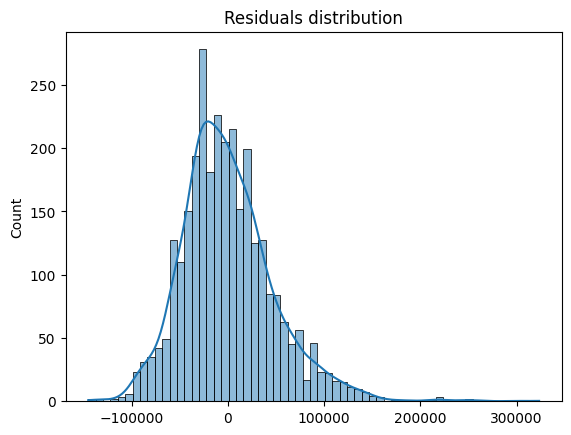

In [48]:
# Plot histogram of residuals 

sns.histplot(residuals, kde= True)

plt.title("Residuals distribution")

plt.show()

<p><b>Observations</b>: We can see that the errir terms are normally distributed. The assumption of normality is satisfied </p>

<p> <b> Linearity of Variables </b></p>
<p> It states that the predictor variables must have a linear relation with the dependent variable. </p>
<p> To test this assumption, we'll plot the residuals and the fitted values and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis. </p>

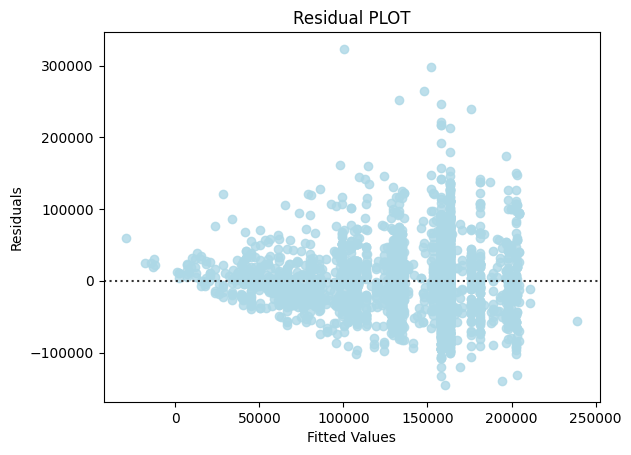

In [49]:
# Predicted values 

fitted = olsmodel3.fittedvalues

sns.residplot(x = fitted, y= residuals,  color="lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residuals")

plt.title("Residual PLOT")

plt.show()

<p><b> Observations;</b>
    <ol>
        <li> We can see that there is some pattern in fitted values and residuals, the residuals are not randomly distributed </li>
        <li> Let's try to fix this. We can apply the log transformation on the target variable and try to build a new model</li>
    </ol>
</p>

In [50]:
# Log transformation on the target variable 

train_target_log= np.log(y_train)

In [51]:
# Fitting new model with the transformed target variable 
olsmodel4 = sm.OLS(train_target_log, x_train3)

olsmodel4 = olsmodel4.fit()

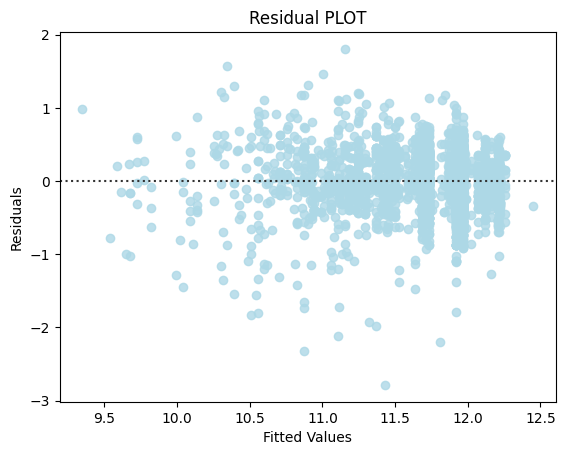

In [52]:
# Predicted values 

fitted = olsmodel4.fittedvalues

residuals = olsmodel4.resid

sns.residplot(x = fitted, y= residuals,  color="lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residuals")

plt.title("Residual PLOT")

plt.show()

In [53]:
print(olsmodel4.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     201.1
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:00:56   Log-Likelihood:                -1435.5
No. Observations:                3004   AIC:                             2911.
Df Residuals:                    2984   BIC:                             3031.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


<p> The model performance has improved significally. The R-squared has increased from 0.41 to 0.56 </p>

<p><b> No Heteroscedasticity </b></p>
<p><b> Test for Homoscedasticity </b></p>
<ol>
    <li> Homoscedasticity: If the variance pf the residuals are symmetrically distributed across the regression line, then the data is said to homoscedasticity </li>
    <li> Heteroscedasticity: If the varianceg is unequal across the regression line, then the data is said to ben heteroscedastic. In this case, the residuals can form an arrow shape or any other non symmetric shape. </li>
    <li> We will use Goldfeld-Quandt test to check homoscedasticity:
        <ol>
            <li> Null hypothesis: Residuals are homoscedastic </li>
            <li> Alternative hypothesis: Residuals are hetroscedastic </li>
        </ol>
    </li>
</ol>

In [54]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [55]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(train_target_log, x_train3)

lzip(name, test)

[('F statistic', 1.0280095605442363), ('p-value', 0.297491832143344)]

<p> As we observe from the above test, the p-value is greater than 0.05, so we fail to reject the null-hypothesis. That means the residuals are homoscedastic. </p>
<p> Let's go evaluate the model we just created using the test data</p>

In [56]:
lin_reg_test4 = model_performance_regression(olsmodel4, x_test3, np.log(y_test))
lin_reg_test4

,RMSE,MAE,R-squared,Adj. R-squared,MAPE,MSE
0,0.414442,0.297519,0.546363,0.533934,2.603638,0.171762


<p><mark> Below, we are checking the cross-validation score to identify if the model that we have built is underfitted, overfitted or just right fit model. </mark></p>

In [57]:
#Fitting linear model 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression()

cv_score11 = cross_val_score(linearregression, x_train3, train_target_log, cv=10)

cv_score12 = cross_val_score(linearregression, x_train3, train_target_log, cv=10,
                            scoring='neg_mean_squared_error')

print("R-Squared: %0.3f (+/- %0.3f)" % (cv_score11.mean(), cv_score11.std()*2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" %(-1*cv_score12.mean(), cv_score12.std()*2))

R-Squared: 0.549 (+/- 0.071)
Mean Squared Error: 0.156 (+/- 0.027)


<p><b> Observations:</b>
    <ol> 
        <li> The R-Squared on the cross-validation is 0.549 which is almost similar to the R-Squared on the training dataset. </li>
        <li> The MSE on cross-validation is 0.156 which is almost similar to the MSE on the training dataset. </li>
    </ol>
</p>
<p> It seems like that our models is just right fit. It is giving a generalized performance. </p>

<h3> Other Models </h3>
<p>We try to create more complex models with the goal of increasing modeling performance. 
We are going to test two additional models :
    <ol>
        <li> Ridge Regression </li>
        <li> Decision Tree Regressor : we may have issues, as this model requires a large amount of data to work properly. But it could help us capture nonlinearities that we would otherwise fail to capture using linear modeling.</li>
    </ol>
</p>

<h5> Ridge Regression </h5>

In [58]:
ridge = Ridge()

In [59]:
ridge.fit(x_train3, np.log(y_train))

model_pref(ridge, x_train3, x_test3, np.log(y_train), np.log(y_test))

    Data      RMSE       MAE      MAPE
0  Train  0.390277  0.287820  2.510819
1   Test  0.414208  0.297636  2.605324


In [60]:
ridge_regression_perf_test = model_performance_regression(ridge, x_test3, np.log(y_test))

ridge_regression_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE,MSE
0,0.414208,0.297636,0.546874,0.53446,2.605324,0.171569


<p>Ridge regression is producing similar results in comparison to Linear Regression without regularization.

There is some scope to improve the model's performance, as there is a feeling that we are not able to fully model the relationship using linear models.

Let's now build Non-Linear Regression models like Decision Tree Regressors and Random Forest Regressors and check their performance.</p>

<h5> Decision Tree Regressor </h5>

In [63]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state= 1)

# Fitting the model 
dt_regressor.fit(x_train3, np.log(y_train))

# Model performance on test data i.e. prediction 
dt_regressor_perf_test = model_performance_regression(dt_regressor, x_test3, np.log(y_test))

dt_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE,MSE
0,0.441634,0.309148,0.484882,0.470769,2.713781,0.195041


<p><b> Observations </b>: as we assumed earlier we could not best model the data using a nonlinear model, the reason may be related to the fact that we have a small amount of data and that it is not enough to best train this type of model.</p>

<h2> Conclusion </h2>
<p>In conclusion, we can say that we have created a robust model but one that does not capture all the variability of the target variable. Among the models that have been created, the one with better performance is linear regression, which generalizes the situation quite well and can explain the variability of the data quite well. </p>
<p>To improve the situation, it is recommended that many more data be collected so that increasingly robust models can be built. In addition, improvements could be made with regard to modeling, in fact clusters could be created for the variables "company_location," "job_title," and "employee_location" so that clusters could be created as homogeneous as possible and information could be added that would be useful in explaining the target variable.</p>